In [8]:
import tensorflow as tf
import os

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
import cv2
import imghdr

In [12]:
data_dir = 'data' 

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/happy/o-HAPPY-facebook.jpg
Image not in ext list data/happy/3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Image not in ext list data/happy/happy-people-having-fun-over-260nw-611293913.jpg
Image not in ext list data/happy/56f455011e0000b300705475.jpeg
Image not in ext list data/happy/2560px-Happy_People.jpg
Image not in ext list data/happy/group-happy-people-isolated-over-600w-102307264.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data/sad/50740738-portrC3A4ts-der-traurige-menschen.jpg
Image not in ext list data/sad/44861512-smiling-man-in-a-crowd-of-sad-people.jpg
Image not in ext list data/sad/1800x1200_visual_guide_to_seasonal_affective_disorder_sad_slideshow.jpg
Image not in ext list data/sad/sad-people-chairs-group-therapy-session_23-2148752072.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 148 files belonging to 2 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

2023-05-09 10:10:32.434546: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


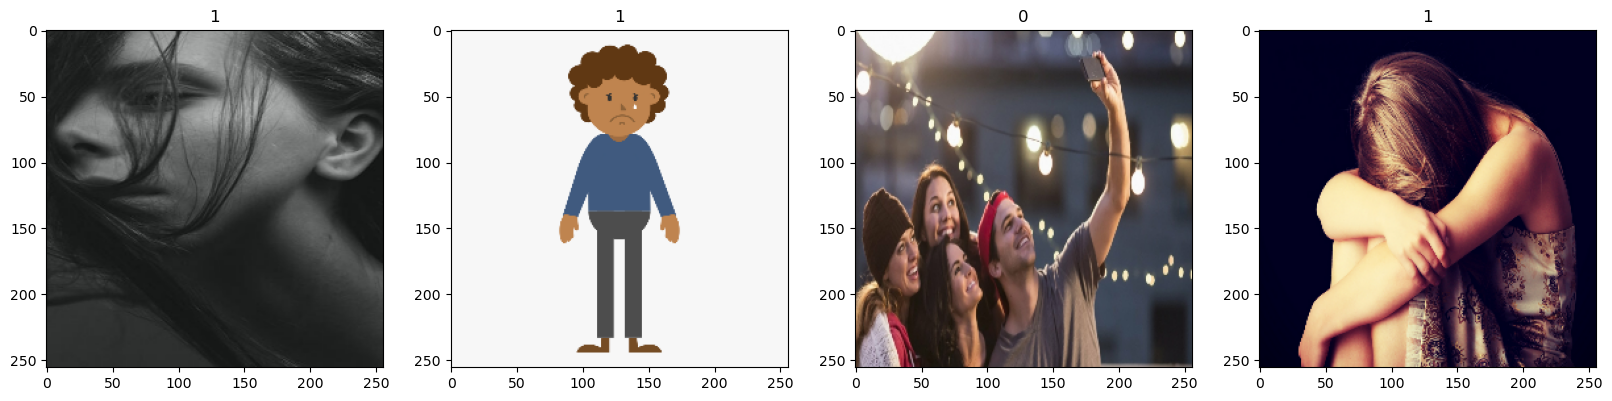

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          [4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          [4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          ...,
          [4.5098040e-01, 5.6470591e-01, 1.4901961e-01],
          [4.4705883e-01, 5.6078434e-01, 1.4509805e-01],
          [4.4633886e-01, 5.6078434e-01, 1.4581801e-01]],
 
         [[4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          [4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          [4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          ...,
          [4.5098040e-01, 5.6470591e-01, 1.4901961e-01],
          [4.4705883e-01, 5.6078434e-01, 1.4509805e-01],
          [4.4633886e-01, 5.6078434e-01, 1.4581801e-01]],
 
         [[4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          [4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          [4.3137255e-01, 5.3333336e-01, 1.8431373e-01],
          ...,
          [4.5098040e-01, 5.6470591e-01, 1.4901961e-01],
          [4.4705883e-01, 5.6078434e-

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size

3

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:

model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 4s 758ms/step - loss: 1.1028 - accuracy: 0.4375 - val_loss: 0.8476 - val_accuracy: 0.4688
Epoch 2/20
3/3 [==============================] - 2s 661ms/step - loss: 0.8140 - accuracy: 0.4167 - val_loss: 0.6853 - val_accuracy: 0.5625
Epoch 3/20
3/3 [==============================] - 3s 707ms/step - loss: 0.6885 - accuracy: 0.6042 - val_loss: 0.6825 - val_accuracy: 0.7188
Epoch 4/20
3/3 [==============================] - 2s 652ms/step - loss: 0.6784 - accuracy: 0.7708 - val_loss: 0.6704 - val_accuracy: 0.8438
Epoch 5/20
3/3 [==============================] - 2s 642ms/step - loss: 0.6573 - accuracy: 0.7708 - val_loss: 0.6126 - val_accuracy: 0.6562
Epoch 6/20
3/3 [==============================] - 3s 678ms/step - loss: 0.6308 - accuracy: 0.6458 - val_loss: 0.5698 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 2s 661ms/step - loss: 0.5980 - accuracy: 0.6667 - val_loss: 0.5168 - val_accuracy: 0.7500
Epoch 8/20
3/3 [====

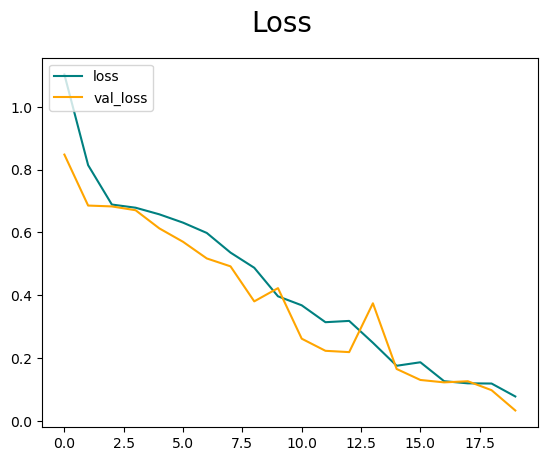

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

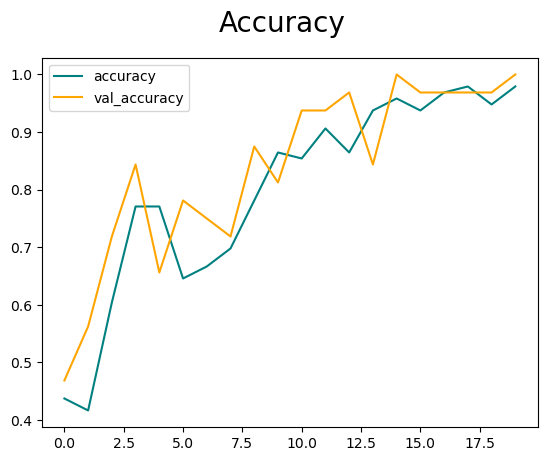

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [39]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


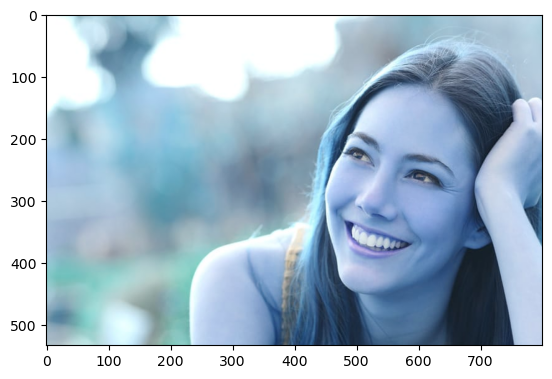

In [92]:
import cv2
testimage = 'happy4.jpg'
img = cv2.imread(testimage)
plt.imshow(img)
plt.show()

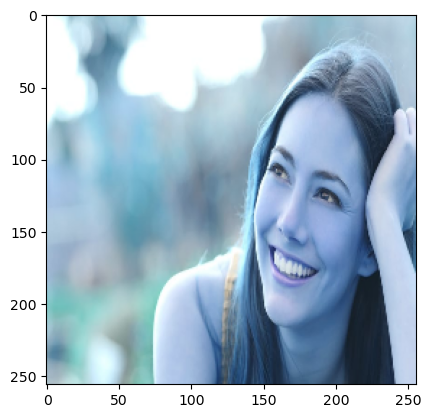

In [93]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [95]:
yhat

array([[0.3189524]], dtype=float32)

In [96]:

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
